 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Martín Collado<br>
**ID Number**: 2039907


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [2]:
IDnumber = 2039907 #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])


X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]
print(permutation)

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200
[ 48 150 128 170 134   6  81  70  51  94  44 105  32  77   0  55  85 156
 107 195 159 184 163  30  99  68 101  37  20 144  93  14  61 161  24 100
  42 114  26 125 148 137 154 124 180 196  58 129   7 171 191  47  63 138

We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [4]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


# m_training needs to be the number of samples in the training set
m_training = int(m*0.75)
#print(m_training)
print("\nNumber of training samples:", m_training)

# m_test needs to be the number of samples in the test set
m_test = int(m*0.25)
#print(m_test)
print("\nNumber of test samples:", m_test)



# X_training = instances for training set
X_training = X[0:m_training]


#Y_training = labels for the training set
Y_training = Y[0:m_training]



# X_test = instances for test set
X_test = X[m_training:]

# Y_test = labels for the test set
Y_test = Y[m_training:]


#print(Y_training) # to make sure that Y_training contains both 1 and -1
print("\nNumber of classical instances in training:", np.sum(Y_training==-1))
print("Number of metal instances in training:", np.sum(Y_training==1))

#print(Y_test) # to make sure that Y_test contains both 1 and -1
print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))
print(X_training)


Number of training samples: 150

Number of test samples: 50

Number of classical instances in training: 76
Number of metal instances in training: 74

Number of classical instances in test: 24
Number of metal instances in test: 26
Shape of training set: (150, 3)
Shape of test set: (50, 3)
[[1.03359375e+02 2.45015087e-01 1.49719664e+03]
 [1.35999178e+02 6.34761669e-01 3.40310190e+03]
 [6.15234375e+01 4.29974584e-01 2.38938800e+03]
 [8.91029095e+01 4.26884734e-01 2.14160877e+03]
 [1.84570312e+02 5.41847119e-01 3.04839150e+03]
 [9.57031250e+01 2.84017623e-01 1.18463214e+03]
 [1.17453835e+02 2.17421432e-01 1.17171850e+03]
 [7.17773438e+01 2.34236042e-01 1.52664707e+03]
 [8.33543347e+01 2.16583675e-01 1.37156100e+03]
 [1.35999178e+02 2.40704898e-01 9.01834481e+02]
 [1.23046875e+02 2.07163261e-01 8.28754442e+02]
 [1.51999081e+02 5.81357066e-01 2.93952400e+03]
 [1.72265625e+02 2.60483112e-01 1.34027064e+03]
 [1.51999081e+02 2.94410143e-01 1.27904166e+03]
 [9.22851562e+01 2.23738306e-01 2.1927

We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [5]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Training set in homogeneous coordinates:")
print(X_training[:10])
print(X_training.shape[1])

Training set in homogeneous coordinates:
[[1.00000000e+00 1.03359375e+02 2.45015087e-01 1.49719664e+03]
 [1.00000000e+00 1.35999178e+02 6.34761669e-01 3.40310190e+03]
 [1.00000000e+00 6.15234375e+01 4.29974584e-01 2.38938800e+03]
 [1.00000000e+00 8.91029095e+01 4.26884734e-01 2.14160877e+03]
 [1.00000000e+00 1.84570312e+02 5.41847119e-01 3.04839150e+03]
 [1.00000000e+00 9.57031250e+01 2.84017623e-01 1.18463214e+03]
 [1.00000000e+00 1.17453835e+02 2.17421432e-01 1.17171850e+03]
 [1.00000000e+00 7.17773438e+01 2.34236042e-01 1.52664707e+03]
 [1.00000000e+00 8.33543347e+01 2.16583675e-01 1.37156100e+03]
 [1.00000000e+00 1.35999178e+02 2.40704898e-01 9.01834481e+02]]
4


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [6]:
# A template is provided, but feel free to build a different implementation



def perceptron_update(current_w, x, error):
    # Place in this function the update rule of the perceptron algorithm
    
    new_w= current_w + np.dot(error,x)
    
    return new_w
    

def perceptron(X, Y, max_num_iterations):
    # Place in this function the main section of the perceptron algorithm
    
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    curr_w = np.zeros(X.shape[1])
    best_w = 0
    num_samples = X.shape[0]
    best_error = 0
    
    index_misclassified = 0 #will be ovewritten
    num_misclassified = 0 #will be ovewritten
    
    # Variables t check the number of samples classified
    index_classified = 0 
    num_classified = 0 
    
    #Variables to check number of iterations
    whilehechos = 0
    
    errors=[]
    ptgerrors=[]
    
    
    #main loop continue until all samples correctly classified or max # iterations reached
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        
        index_misclassified = 0
        num_misclassified = 0
       
        whilehechos += 1
        
       
         
        # avoid working always on the same sample, you can use a random permutation or randomize the choice of misclassified
        permutation = np.random.permutation(num_samples)
        X = X[permutation]
        Y = Y[permutation]
        
        # PLACE YOUR CODE TO RANDOMIZE
        
        error= []
        
        for i in range(num_samples):
                     
            # PLACE YOUR CODE
            #check if the i-th randomly selected sample is misclassified
            # store the number of randomly classified samples and the index of at least one of them 
            wx = np.dot(curr_w,X[i])
            
            if (wx>0):
                est_y = 1
            else:
                est_y = -1
                
            error.append(Y[i] - est_y)
            if(error[i]!=0):
                index_misclassified = i
                num_misclassified += 1
                
        #update  error count, keep track of best solution
        errors.append(num_misclassified)
        ptgerrors.append(num_misclassified/num_samples)
        
        if (num_misclassified <= min(errors)):
            best_w = curr_w
        num_iter += 1
    
            
        
        
        #call update function using a misclassifed sample
        curr_w = perceptron_update(curr_w,X[index_misclassified],error[index_misclassified])
        best_error=min(ptgerrors)
        
        
        
        
    
    
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [7]:
#now run the perceptron for 100 iterations

w_found, error = perceptron(X_training,Y_training,100)
print("Training Error of perceptron (100 iterations): " + str(error))
print(w_found)



Training Error of perceptron (100 iterations): 0.15333333333333332
[-3.40000000e+01 -4.45375146e+03 -9.64651431e-01  3.54229176e+02]


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [8]:
#now use the w_found to make predictions on test dataset

num_errors = 0
est_y = []
errors= []


# PLACE YOUR CODE to compute the number of errors
for i in range(m_test):
    xw=np.dot(w_found,X_test[i])
    if(xw>0):
        est_y.append(1)
    else:
        est_y.append(-1)
    error = Y_test[i]-est_y[i]
    
    if (error!=0):
        num_errors+=1
        errors.append(error)
    else:
        errors.append(error)

        
true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))
print("Estimated_Y:"+str(est_y))
print(errors)
print("Number of Errors:",num_errors)

Test Error of perpceptron (100 iterations): 0.22
Estimated_Y:[1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1]
[0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, -2, 0, -2, 0, 0, 0, 0, 2, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, -2, 0, 0, 0, 0, 0, -2, -2, 0, 0, 0, 0, 0, 0, 0, 0, -2]
Number of Errors: 11


**TO DO** **[Answer the following]** What about the difference between the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**
The number of misclassified samples is usually bigger in the test set than in the data set. Besides, when I run the perceptron with 100 iterations the training error varies considerably, sometimes is between 0.1 and 0.2 and other times is more than 0.3 which it's like its double.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [9]:
#now run the perceptron for 4000 iterations here!

# PLACE YOUR CODE

w_found, error = perceptron(X_training,Y_training,4000)

print("Training Error of perpceptron (4000 iterations): " + str(error))

# PLACE YOUR CODE

num_errors = 0
est_y = []
errors= []

for i in range(m_test):
    xw=np.dot(X_test[i],w_found)
    if(xw>0):
        est_y.append(1)
    else:
        est_y.append(-1)
    error = Y_test[i]-est_y[i]
    if (error!=0):
        num_errors+=1
        errors.append(error)
    else:
        errors.append(error)
        
true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))
print("Estimated_Y:", est_y)
print("Number of Errors:",num_errors)





Training Error of perpceptron (4000 iterations): 0.1
Test Error of perpceptron (4000 iterations): 0.14
Estimated_Y: [1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1]
Number of Errors: 7


**TO DO** [Answer the following] What about the difference between the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell] 

**ANSWER QUESTION 2**
When the number of iterations is bigger, the similarity between the training error and the test error increases. In comparison with the perceptron of 100 iterations, the training and test errors become stable, smaller and closer to each other. This makes me think that with this number of iterations we are getting a good prediction model. 

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [10]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [11]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

m_training = int(0.75*m)
m_test = int(0.25*m)

X_training = X[0:m_training]
Y_training = Y[0:m_training]


X_test = X[m_training:]
Y_test = Y[m_training:]


print("Number of samples in the test set:", m_test)
print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("\nShape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

Number of samples in the test set: 50

Number of classical instances in test: 32
Number of metal instances in test: 18

Shape of training set: (150, 3)
Shape of test set: (50, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [12]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5,fit_intercept=True) #a large C disables regularization

#learn from training set

logreg.fit(X_training,Y_training)

#predict on training set

y_pred_training = logreg.predict(X_training)

#print the error rate = fraction of misclassified samples

errors_training = 0
for i in range(m_training):
    error = Y_training[i] - y_pred_training[i]
    if (error!=0):
        errors_training += 1

error_rate_training = errors_training / m_training

print("Error rate on training set: ", error_rate_training)



#predict on test set

y_pred_test = logreg.predict(X_test)

#print the error rate = fraction of misclassified samples

errors_test = 0
for i in range(m_test):
    error = Y_test[i] - y_pred_test[i]
    if (error!=0):
        errors_test += 1

error_rate_test = errors_test/ m_test

print("Error rate on test set: ", error_rate_test)






Error rate on training set:  0.04666666666666667
Error rate on test set:  0.02


C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [13]:
m_training = int(0.75*m)
m_test = int(0.25*m)

#Training set with features tempo and chroma_sftp
X_training01 = X[0:m_training,[0,1]]
Y_training01 = Y[0:m_training]

X_test01 = X[m_training:,[0,1]]
Y_test01 = Y[m_training:]

#LogisticRegression
logreg01 = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

logreg01.fit(X_training01,Y_training01)
error_rate01 = 1 - logreg01.score(X_test01,Y_test01)

#Training set with features tempo and spectral_centroid
X_training02 = X[0:m_training,[0,2]]
Y_training02 = Y[0:m_training]

X_test02 = X[m_training:,[0,2]]
Y_test02 = Y[m_training:]

#LogisticRegression
logreg02 = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

logreg02.fit(X_training02,Y_training02)
error_rate02 = 1 - logreg02.score(X_test02,Y_test02)

#Training set with features chroma_sftp and spectral_centroid
X_training12 = X[0:m_training,[1,2]]
Y_training12 = Y[0:m_training]

X_test12 = X[m_training:,[1,2]]
Y_test12 = Y[m_training:]

#LogisticRegression
logreg12 = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

logreg12.fit(X_training12,Y_training12)
error_rate12 = 1 - logreg12.score(X_test12,Y_test12)

print("Error rate with tempo and chroma_sftp:", error_rate01)
print("Error rate with tempo and spectral_centroid:", error_rate02)
print("Error rate with chroma_sftp and spectral_centroid:",error_rate12)


Error rate with tempo and chroma_sftp: 0.0
Error rate with tempo and spectral_centroid: 0.020000000000000018
Error rate with chroma_sftp and spectral_centroid: 0.020000000000000018


C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = 0
index_feature2 = 1
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

X_training = X_reduced[0:m_training]
Y_training = Y[0:m_training]

X_test = X_reduced[m_training:]
Y_test = Y[m_training:]


Now learn a model using the training data and measure the performances.

In [15]:
# learning from training data
logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X_training,Y_training)

#print the error rate = fraction of misclassified samples

score = logreg.score(X_test, Y_test)

error_rate_test = 1 - score

# PLACE YOUR CODE

print("Error rate on test set: " + str(error_rate_test))

Error rate on test set: 0.0


C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3** I selected features tempo and chroma_sftp because the number of misclassified samples in the test set using these 2 features is equal to 0.0, so all the samples are classifed correctly. When I selected the other features the performance was still good, but some of the samples were misclassified.
When we use the three features, the error rate in the test set is quite good too, equal to 0.02.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

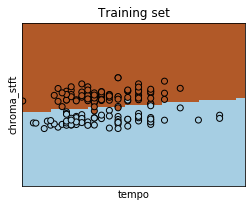

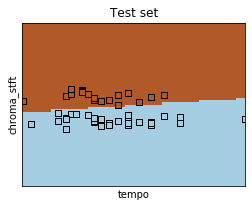

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [17]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [18]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("Shape of data array: " + str(Data.shape))


#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+01]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([3.65578576e+00, 1.15000000e+01, 1.11317400e+01, 7.00000000e-02,
       5.54451400e-01, 6.28297000e+00, 6.84246000e+01, 3.81193180e+00,
       9.64200000e+00, 4.09624000e+02, 1.84286000e+01, 3.56208040e+02,
       1.26987400e+01, 2.25680000e+02]), variance=array([7.47252195e+01, 5.48905812e+02, 4.76198228e+01, 6.52304609e-02,
       1.35838329e-02, 4.97618330e-01, 7.99314163e+02, 4.46304043e+00,
       7.59617595e+01, 2.85605197e+04, 4.67663531e+00, 8.41657137e+03,
       5.13361942e+01, 8.52982926e+03]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [19]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)
m_test = int(num_total_samples*.3)

print ("Cardinality of Training Set: ", m_t)
print ("Cardinality of Test Set: ", m_test)

#shuffle the data
np.random.shuffle(Data)

#training data 

X_training = Data[0:m_t,0:13]
Y_training = Data[0:m_t,13:]
print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = Data[m_t:,0:13]
Y_test = Data[m_t:,13:]
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  500
Cardinality of Training Set:  350
Cardinality of Test Set:  150
Training input data size:  (350, 13)
Training output data size:  (350, 1)
Test input data size:  (150, 13)
Test output data size:  (150, 1)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [20]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training)
 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [ 0. -0.  0. -0. -0. -0.  0.  0.  0. -0.  0.  0. -0.]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [ 0.06742269  0.10114647  0.04534098 -0.01849001 -0.00219017  0.00139716
  0.02036273  0.05646055  0.01069929  0.0429645   0.06158706  0.08489932
  0.04106672]
Std of the test input data: [1.19637241 1.19878383 1.05820638 0.96856577 1.02062774 1.09269237
 0.98205165 1.05557923 1.02771343 1.03973333 1.03694609 0.90548757
 1.12495815]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [21]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH,Y_training)
print("LS coefficients with numpy lstsq:", w_np)

est_y_training = np.dot(X_trainingH,w_np)
print("Estimated Y training:",est_y_training)
print("Real Y:",Y_training)


# compute Residual sums of squares 

esq_loss = (est_y_training - Y_training)**2
print("Squared loss", esq_loss)
RSStr_hand = esq_loss.sum()
print("Residual Sums of Squares", RSStr_hand)

print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

LS coefficients with numpy lstsq: [[226.05714286]
 [ -7.97182141]
 [  6.40354615]
 [  1.00356275]
 [  9.11621166]
 [-16.34628376]
 [ 28.41331828]
 [ -2.11312715]
 [-30.04908867]
 [ 16.50871629]
 [-14.20021589]
 [-18.67001661]
 [  9.09206193]
 [-36.71984715]]
Estimated Y training: [[134.76560545]
 [172.80356903]
 [262.28497736]
 [238.02685095]
 [320.67426162]
 [192.81975288]
 [184.26338573]
 [362.39758212]
 [125.062186  ]
 [141.9182377 ]
 [156.91747073]
 [229.57820069]
 [211.17635125]
 [405.90132809]
 [224.65240431]
 [408.11698894]
 [212.70431267]
 [201.14326174]
 [230.57796012]
 [327.87885278]
 [283.26758221]
 [257.45723155]
 [151.24001616]
 [127.78049728]
 [194.24831172]
 [255.42494067]
 [328.75686106]
 [165.93835848]
 [365.10635293]
 [139.6051403 ]
 [334.33635583]
 [244.441047  ]
 [230.31069258]
 [310.5922487 ]
 [232.11023856]
 [365.03670597]
 [103.6166463 ]
 [213.06719775]
 [258.52825116]
 [317.61310301]
 [257.45871639]
 [199.28595588]
 [297.87742763]
 [149.61660334]
 [262.90699127]

C:\Users\Administrador\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [22]:
#compute predictions on training and test

prediction_training = np.dot(X_trainingH,w_np)
prediction_test = np.dot(X_testH,w_np)

#what about the loss for points in the test data?
esq_loss = (prediction_test - Y_test)**2
RSS_test = esq_loss.sum()

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS on test data: 404471.9721519005
Loss estimated from test data: 2696.4798143460034


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

The training error is smaller than the test error. This could be explained as the features in the test set are more difficult to classify or the samples in the training set are easier to classify.


## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [23]:
from sklearn import linear_model

# build the LinearRegression() model and train it
LinReg = linear_model.LinearRegression()

# PLACE YOUR CODE

LinReg.fit(X_trainingH, Y_training)



print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

# predict output values on training and test sets

predicted_y_training =  LinReg.predict(X_trainingH)
predicted_y_test = LinReg.predict(X_testH)


# return a prediction score based on the coefficient of determination
print("Accuracy on training data:", LinReg.score(X_trainingH, Y_training))
print("Accuracy on test data:", LinReg.score(X_testH, Y_test))

Intercept: [226.05714286]
Least-Squares Coefficients: [[  0.          -7.97182141   6.40354615   1.00356275   9.11621166
  -16.34628376  28.41331828  -2.11312715 -30.04908867  16.50871629
  -14.20021589 -18.67001661   9.09206193 -36.71984715]]
Accuracy on training data: 0.7478137672872216
Accuracy on test data: 0.7252833125372538
